<a href="https://colab.research.google.com/github/tmalik258/Emotion-Sentiment-NLP/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk

nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

# Emotion Sentimen DataSet

In [ ]:
import pandas as pd

path = 'emotion_sentimen_dataset.csv'

df = pd.read_csv(path)
df.head()

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral


In [ ]:
df.columns

Index(['Unnamed: 0', 'text', 'Emotion'], dtype='object')

Dropping 0 index column

In [ ]:
df = df.drop(df.columns[0], axis=1)

df.head()

,text,Emotion
0,i seriously hate one subject to death but now ...,hate
1,im so full of life i feel appalled,neutral
2,i sit here to write i start to dig out my feel...,neutral
3,ive been really angry with r and i feel like a...,anger
4,i feel suspicious if there is no one outside l...,neutral


In [ ]:
df.tail()

,text,Emotion
539876,i feel so ashame of myself for being so needy ...,neutral
539877,i feel useless and you keep telling me that i ...,neutral
539878,i hate needing feeling helpless dependent,hate
539879,i feel like the fashion hype is starting to ca...,neutral
539880,i mean over the last few weeks i ve been getti...,NaN


In [ ]:
df.describe()

,text,Emotion
count,839555,839555
unique,393822,13
top,i feel more adventurous willing to take risks,neutral
freq,32,674538


In [ ]:
df.isnull().any()

text       False
Emotion    False
dtype: bool

In [ ]:
df.isnull().sum()

text       0
Emotion    0
dtype: int64

In [ ]:
df['Emotion'].value_counts()

Emotion
neutral       674538
love           39553
happiness      27175
sadness        17481
relief         16729
hate           15267
anger          12336
fun            10075
enthusiasm      9304
surprise        6954
empty           5542
worry           4475
boredom          126
Name: count, dtype: int64

In [ ]:
df.shape

(839555, 2)

# Graph and Visualization

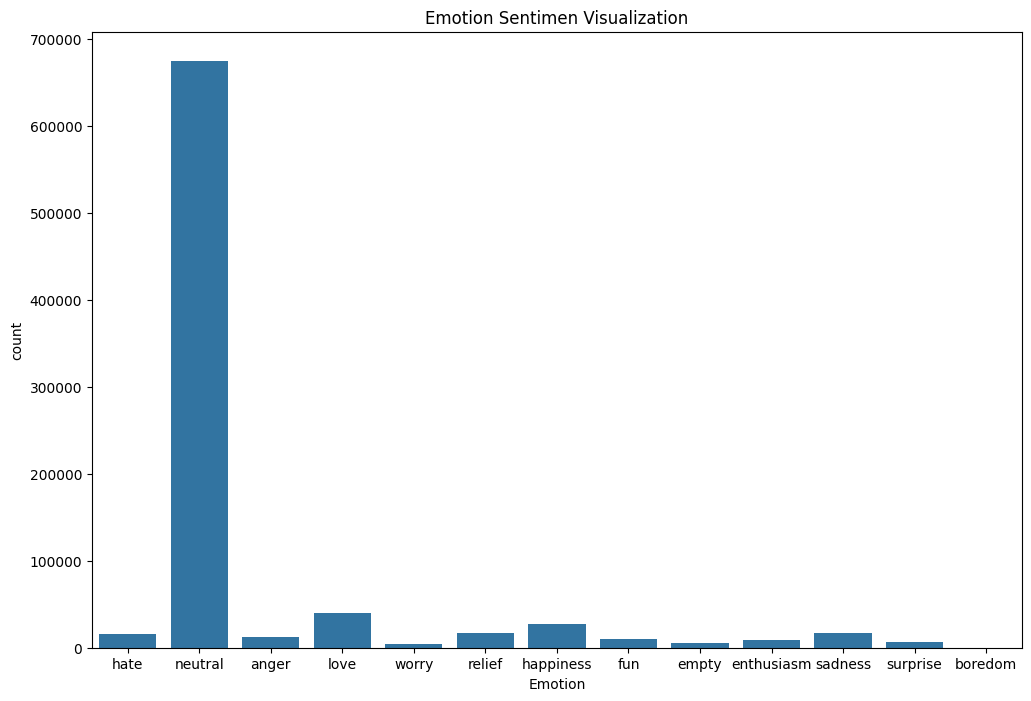

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(x='Emotion', data=df)
plt.title('Emotion Sentimen Visualization')
plt.show()

# Text Normalization
Regex

In [ ]:
import re

Removing URLS

In [ ]:
def remove_urls(text):
  pattern = r'((https?(:\/\/)?)?((\w*\.)?\w+\.\w{2,3}((\/\w*)*)?(\?\w+(&?=\w*)*)?)?)'
  return re.sub(pattern, '', text)

df['messages'] = df['text'].apply(remove_urls)

df['messages'].head()

0    i seriously hate one subject to death but now ...
1                   im so full of life i feel appalled
2    i sit here to write i start to dig out my feel...
3    ive been really angry with r and i feel like a...
4    i feel suspicious if there is no one outside l...
Name: messages, dtype: object

Removing www and href words

In [ ]:
def remove_www_href(text):
  pattern = 'www|href'
  return re.sub(pattern, '', text)

df['messages'] = df['messages'].apply(remove_urls)

df['messages'].head()

0    i seriously hate one subject to death but now ...
1                   im so full of life i feel appalled
2    i sit here to write i start to dig out my feel...
3    ive been really angry with r and i feel like a...
4    i feel suspicious if there is no one outside l...
Name: messages, dtype: object

Removing Punctuations

In [ ]:
def remove_www_href(text):
  pattern = '(@\w*\s*)?[\.%\$,\(\)!\*\-]?(\#\w*)?'
  return re.sub(pattern, '', text)

df['messages'] = df['messages'].apply(remove_urls)

Stop Words

In [ ]:
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Converting to Lowercase

In [ ]:
def lowercase_function(text):
  return text.lower()

df['messages'] = df['messages'].apply(lowercase_function)

df['messages'].tail()

539876    i feel so ashame of myself for being so needy ...
539877    i feel useless and you keep telling me that i ...
539878            i hate needing feeling helpless dependent
539879    i feel like the fashion hype is starting to ca...
539880    i mean over the last few weeks i ve been getti...
Name: messages, dtype: object

Word Tokenization

In [ ]:
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  """Removes stop words from a sentence and performs word tokenization."""
  word_tokens = word_tokenize(text)
  return [w for w in word_tokens if w not in stop_words]


df['messages'] = df['messages'].apply(remove_stopwords)

df['messages']

0         [seriously, hate, one, subject, death, feel, r...
1                          [im, full, life, feel, appalled]
2         [sit, write, start, dig, feelings, think, afra...
3         [ive, really, angry, r, feel, like, idiot, tru...
4         [feel, suspicious, one, outside, like, rapture...
                                ...                        
539876           [feel, ashame, needy, clingy, controlling]
539877               [feel, useless, keep, telling, answer]
539878        [hate, needing, feeling, helpless, dependent]
539879    [feel, like, fashion, hype, starting, calm, pi...
539880    [mean, last, weeks, getting, little, jabs, bub...
Name: messages, Length: 539881, dtype: object

Stemming

In [ ]:
from nltk.stem import PorterStemmer

# stemming
ps = PorterStemmer()

def stemming(text):
  return [ps.stem(w) for w in text]


df['messages'] = df['messages'].apply(stemming)

df['messages']

0         [serious, hate, one, subject, death, feel, rel...
1                             [im, full, life, feel, appal]
2         [sit, write, start, dig, feel, think, afraid, ...
3         [ive, realli, angri, r, feel, like, idiot, tru...
4         [feel, suspici, one, outsid, like, raptur, hap...
                                ...                        
539876                [feel, asham, needi, clingi, control]
539877                  [feel, useless, keep, tell, answer]
539878                 [hate, need, feel, helpless, depend]
539879    [feel, like, fashion, hype, start, calm, piec,...
539880    [mean, last, week, get, littl, jab, bubbl, typ...
Name: messages, Length: 539881, dtype: object

Lemmatization

In [ ]:
from nltk.stem import 	WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
  return [wordnet_lemmatizer.lemmatize(w) for w in text]


df['messages'] = df['messages'].apply(lemmatizer)

df['messages']

0         [serious, hate, one, subject, death, feel, rel...
1                             [im, full, life, feel, appal]
2         [sit, write, start, dig, feel, think, afraid, ...
3         [ive, realli, angri, r, feel, like, idiot, tru...
4         [feel, suspici, one, outsid, like, raptur, hap...
                                ...                        
539876                [feel, asham, needi, clingi, control]
539877                  [feel, useless, keep, tell, answer]
539878                 [hate, need, feel, helpless, depend]
539879    [feel, like, fashion, hype, start, calm, piec,...
539880    [mean, last, week, get, littl, jab, bubbl, typ...
Name: messages, Length: 539881, dtype: object

Sentence Tokenization

In [ ]:
from nltk.tokenize import sent_tokenize

def sentence_tokkenizer(text):
  return sent_tokenize(' '.join(text))

df['messages'] = df['messages'].apply(sentence_tokkenizer)

df['messages']

0         [serious hate one subject death feel reluct drop]
1                                 [im full life feel appal]
2         [sit write start dig feel think afraid accept ...
3         [ive realli angri r feel like idiot trust firs...
4         [feel suspici one outsid like raptur happen so...
                                ...                        
539876                    [feel asham needi clingi control]
539877                      [feel useless keep tell answer]
539878                     [hate need feel helpless depend]
539879    [feel like fashion hype start calm piec sold t...
539880     [mean last week get littl jab bubbl type feelin]
Name: messages, Length: 539881, dtype: object

In [ ]:
df['messages'] = [' '.join(message) for message in df['messages']]

# Removing NULL Values

In [ ]:
df.dropna(axis=0, inplace=True)

,text,Emotion,messages
0,i seriously hate one subject to death but now ...,hate,serious hate one subject death feel reluct drop
1,im so full of life i feel appalled,neutral,im full life feel appal
2,i sit here to write i start to dig out my feel...,neutral,sit write start dig feel think afraid accept p...
3,ive been really angry with r and i feel like a...,anger,ive realli angri r feel like idiot trust first...
4,i feel suspicious if there is no one outside l...,neutral,feel suspici one outsid like raptur happen someth
...,...,...,...
539875,i want to feel that i m accepted and wanted,neutral,want feel accept want
539876,i feel so ashame of myself for being so needy ...,neutral,feel asham needi clingi control
539877,i feel useless and you keep telling me that i ...,neutral,feel useless keep tell answer
539878,i hate needing feeling helpless dependent,hate,hate need feel helpless depend


In [ ]:
df['Emotion'].unique()

array(['hate', 'neutral', 'anger', 'love', 'worry', 'relief', 'happiness',
       'fun', 'empty', 'enthusiasm', 'sadness', 'surprise', 'boredom',
       nan], dtype=object)

# Model training and testing

# Label Encoding

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Sentiment'.
df['Sentiment']= label_encoder.fit_transform(df['Emotion'])

df['Sentiment'].unique()

array([ 6,  8,  0,  7, 12,  9,  5,  4,  2,  3, 10, 11,  1, 13])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression


# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Convert the messages data to bag-of-words features
X_bow = vectorizer.fit_transform(df['messages'])

# Split the data into features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X_bow, df['Emotion'], test_size=0.2, random=42)

# Model
model = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9860896301990238
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1556
           1       1.00      0.62      0.76        13
           2       0.95      0.97      0.96       707
           3       0.91      0.96      0.94      1156
           4       0.93      0.91      0.92      1296
           5       0.95      0.96      0.96      3515
           6       0.97      0.98      0.98      2004
           7       0.92      0.97      0.95      5030
           8       1.00      0.99      0.99     86794
           9       0.98      0.97      0.97      2193
          10       0.96      0.97      0.97      2278
          11       0.99      0.99      0.99       890
          12       0.89      0.87      0.88       545

    accuracy                           0.99    107977
   macro avg       0.96      0.93      0.94    107977
weighted avg       0.99      0.99      0.99    107977



Make predictions on new text data

In [ ]:
unique_emotion = ['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry', 'nan']

unique_emotion

['anger',
 'boredom',
 'empty',
 'enthusiasm',
 'fun',
 'happiness',
 'hate',
 'love',
 'neutral',
 'relief',
 'sadness',
 'surprise',
 'worry',
 'nan']

In [ ]:
new_text = ["im happy to know you are achieving what you want"]
new_text_bow = vectorizer.transform(new_text)
y_pred = model.predict(new_text_bow)

print("Predicted Sentiment:", y_pred[0], unique_emotion[y_pred[0]])

Predicted Sentiment: 8 neutral


In [ ]:
new_text = ["im sad as my father is dead"]
new_text_bow = vectorizer.transform(new_text)
y_pred = model.predict(new_text_bow)

print("Predicted Sentiment:", y_pred[0], unique_emotion[y_pred[0]])

Predicted Sentiment: 10 sadness


In [ ]:
!pip install gradio

In [ ]:
def emotion_checker(text):
  new_text_bow = vectorizer.transform([text])
  y_pred = model.predict(new_text_bow)
  return f"Predicted Sentiment: {unique_emotion[y_pred[0]]}"

In [ ]:
import gradio as gr

demo = gr.Interface(fn=emotion_checker, inputs="text", outputs="text")
demo.launch()

ModuleNotFoundError: No module named 'gradio'